In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from main_backtest import run_full_backtest
import statsmodels.api as sm
from cal_backtest_stats import *

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
params = {
    'start_year': 2010, 
    'end_year': 2024, 
    'top_corr_pairs': 20,
    'num_pairs': 15,
    'trigger_std': 1.96,
    'stoploss_std': 3.0,
    'transaction_cost': 0.0050
}
sr_LT_pct_ret, all_pair_sharpe_list = run_full_backtest(**params)
sr_nav = (100*(1+sr_LT_pct_ret).cumprod())

/Users/shenyifan/Documents/equities_mean_reversion/cal_backtest_stats.py:33: RuntimeWarning: invalid value encountered in double_scalars
  sharpe = ret/vol
/Users/shenyifan/Documents/equities_mean_reversion/cal_backtest_stats.py:37: RuntimeWarning: invalid value encountered in double_scalars
  max_dd_vol = max_dd / vol
/Users/shenyifan/Documents/equities_mean_reversion/cal_backtest_stats.py:33: RuntimeWarning: invalid value encountered in double_scalars
  sharpe = ret/vol
/Users/shenyifan/Documents/equities_mean_reversion/cal_backtest_stats.py:37: RuntimeWarning: invalid value encountered in double_scalars
  max_dd_vol = max_dd / vol
/Users/shenyifan/Documents/equities_mean_reversion/cal_backtest_stats.py:33: RuntimeWarning: invalid value encountered in double_scalars
  sharpe = ret/vol
/Users/shenyifan/Documents/equities_mean_reversion/cal_backtest_stats.py:37: RuntimeWarning: invalid value encountered in double_scalars
  max_dd_vol = max_dd / vol
/Users/shenyifan/Documents/equities_m

Text(0.5, 1.0, 'Sharpe ratio distribution - all tested pairs in history')

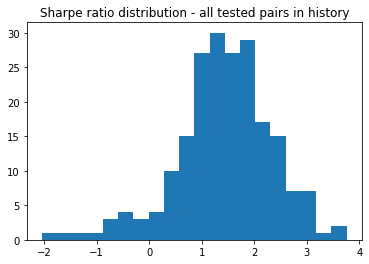

In [10]:
plt.hist(all_pair_sharpe_list, bins=20)
plt.title('Sharpe ratio distribution - all tested pairs in history')

<AxesSubplot:>

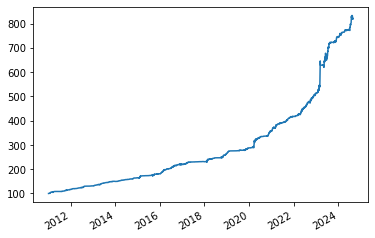

In [3]:
sr_nav.plot()

In [4]:
generate_stats_table(sr_nav.to_frame())

,0
Annualised Return,0.166425
Annualised Volatility,0.052736
Sharpe Ratio,3.155817
Max Drawdown,-0.042166
Max Drawdown/Vol Ratio,-0.799575
Sortino Ratio,5.442396
% +ve month,0.945122


Overall the backtest performance is very impressive, likely due to high hit ratio and diversification from having multiple pairs in the same portfolio. We test multiple parameters combinations and plot heatmaps to show how key stats change with parameters

In [5]:
from itertools import product
# run multiple parameters to test parameter sensitivity 
params_config = {
                'num_pairs': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],   # number of pairs selected to test
                'trigger_std': [1.0, 1.5, 1.96], # entry position standard deviation
                'stoploss_std': [2.5, 3.0],     # stop loss standard deviation
                'transaction_cost': [0.0050]   # assume 50bps transaction cost for all stocks
                }  

# 15 * 3 * 2 = 90 combinations to test
all_params = [dict(zip(params_config, val))\
              for val in product(*params_config.values())]
records_dict = {}
for i, para in enumerate(all_params):
    print(i)
    sr_LT_pct_ret = run_full_backtest(**para)
    sr_nav = (100*(1+sr_LT_pct_ret).cumprod())
    stats_dict = cal_backtest_stats(sr_LT_pct_ret)
    para.update(stats_dict)
    records_dict[i] = para.copy()
df_all_records = pd.DataFrame(data=records_dict).T


0


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


1


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


2


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


3


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


4


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


5


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


6


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


7


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


8


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


9


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


10


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


11


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


12


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


13


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


14


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


15


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


16


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


17


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


18


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


19


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


20


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


21


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


22


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


23


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


24


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


25


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


26


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


27


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


28


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


29


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


30


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


31


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


32


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


33


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


34


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


35


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


36


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


37


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


38


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


39


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


40


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


41


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


42


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


43


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


44


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


45


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


46


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


47


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


48


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


49


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


50


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


51


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


52


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


53


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


54


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


55


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


56


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


57


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


58


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


59


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


60


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


61


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


62


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


63


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


64


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


65


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


66


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


67


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


68


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


69


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


70


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


71


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


72


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


73


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


74


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


75


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


76


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


77


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


78


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


79


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


80


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


81


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


82


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


83


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


84


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


85


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


86


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


87


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


88


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


89


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


In [6]:
df_all_records.to_csv('parameter_sensitivity_test_heatmaps/bakctest_all_records.csv')

In [7]:
df_all_records

,num_pairs,trigger_std,stoploss_std,transaction_cost,cum_ret,ret,vol,sharpe,max_dd,max_dd_vol,sortino,pct_positive_month,pct_positive_yr
0,1.0,1.00,2.5,0.005,16.037874,0.225195,0.217832,1.033798,-0.262192,-1.203643,1.183172,0.573171,0.928571
1,1.0,1.00,3.0,0.005,19.382541,0.242299,0.218951,1.106632,-0.262192,-1.197491,1.270909,0.579268,0.928571
2,1.0,1.50,2.5,0.005,11.591308,0.196421,0.187260,1.048924,-0.175091,-0.935014,1.114185,0.481707,0.928571
3,1.0,1.50,3.0,0.005,13.899132,0.212427,0.188587,1.126411,-0.175091,-0.928432,1.202113,0.487805,1.000000
4,1.0,1.96,2.5,0.005,6.945199,0.152400,0.161621,0.942944,-0.175091,-1.083340,0.767357,0.268293,0.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,15.0,1.00,3.0,0.005,31.935756,0.288542,0.093821,3.075442,-0.096994,-1.033818,4.732213,0.865854,1.000000
86,15.0,1.50,2.5,0.005,18.599332,0.238554,0.073666,3.238325,-0.068200,-0.925803,5.152234,0.920732,1.000000
87,15.0,1.50,3.0,0.005,22.678576,0.256660,0.074545,3.443042,-0.068200,-0.914888,5.522483,0.932927,1.000000
88,15.0,1.96,2.5,0.005,6.420215,0.145789,0.051430,2.834699,-0.042614,-0.828571,4.790043,0.914634,1.000000
